Content
The dataset contains only three columns:

age
interest
success
The content can be applied to various things, e.g. how successful different people learn new sports.

Take a look at the notebook "Decision Border Visualizer" to see how or where a binary classification algorithm draws the separation line(s) for distinguishing purposes.

Data Source
Jannis Seemann
https://www.kaggle.com/datasets/sveneschlbeck/beginners-classification-dataset

In [ ]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [ ]:
df = pd.read_csv("./classification.csv")
df

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0
...,...,...,...
292,27.697220,18.799309,0.0
293,15.150959,72.000352,1.0
294,22.264378,68.453459,1.0
295,25.677420,90.118212,1.0


1. Regresi Logistik
2. Regresi linear
3. Visualisasi data
4. Data Classification

EKSPLORASI DATA

In [ ]:
df

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0
...,...,...,...
292,27.697220,18.799309,0.0
293,15.150959,72.000352,1.0
294,22.264378,68.453459,1.0
295,25.677420,90.118212,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   interest  297 non-null    float64
 2   success   297 non-null    float64
dtypes: float64(3)
memory usage: 7.1 KB


In [ ]:
df.describe()

,age,interest,success
count,297.000000,297.000000,297.000000
mean,23.709718,46.986527,0.569024
std,8.864000,21.956447,0.496049
min,2.347560,-0.852800,0.000000
25%,17.002148,28.689067,0.000000
50%,23.283644,45.695926,1.000000
75%,30.661149,65.171876,1.000000
max,45.773729,97.175508,1.000000


In [ ]:
df['success'].unique()

# success = 1 --> Orangnya sukses
# succes = 0 --> Orangnya kurang sukses

array([0., 1.])

In [ ]:
df[df['success']==1]['success'].count()

169

In [ ]:
df[df['success']==0]['success'].count()

128

In [ ]:
df.isna().any()

#cek apakah data ada yg NaN atau Null

age         False
interest    False
success     False
dtype: bool

3. VISUALISASI DATA

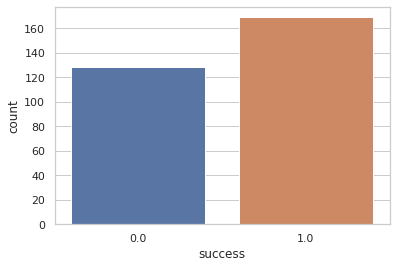

In [ ]:
sns.countplot(x=df['success'])

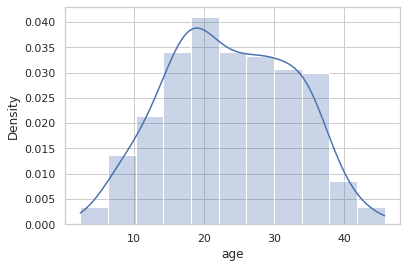

In [ ]:
sns.histplot(df['age'],alpha=0.3,kde=True,stat='density')

Text(0.5, 1.0, 'Age Distribution')

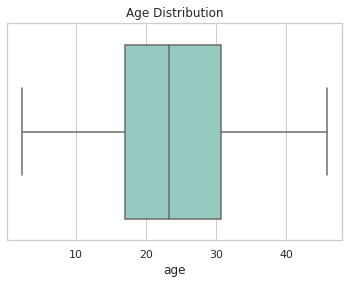

In [ ]:
sns.set_theme(style="whitegrid")
sns.boxplot(x="age", data=df, palette="Set3")
plt.title("Age Distribution")


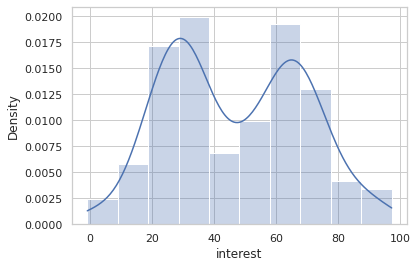

In [ ]:
sns.histplot(df['interest'],alpha=0.3,kde=True,stat='density')

Text(0.5, 1.0, 'Interests Distribution')

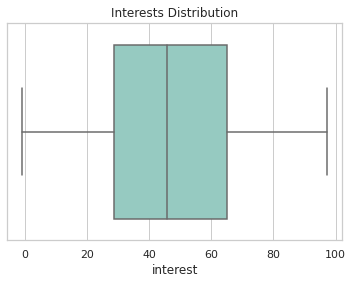

In [ ]:
sns.set_theme(style="whitegrid")
sns.boxplot(x="interest", data=df, palette="Set3")
plt.title("Interests Distribution")

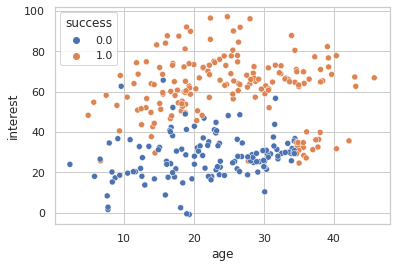

In [ ]:
sns.scatterplot(data=df, x="age", y="interest", hue="success")

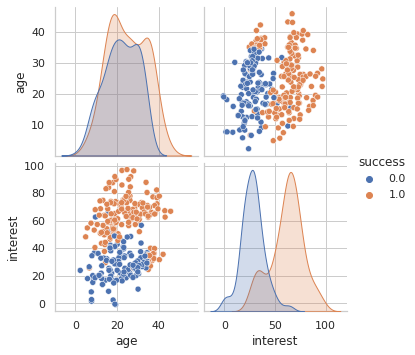

In [ ]:
sns.pairplot(df, hue ='success')

#ternyata yg interestnya tinggi dan usianya tinggi dia yg sukses

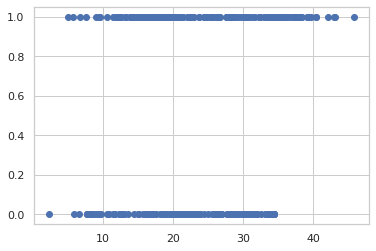

In [ ]:
plt.scatter(df['age'], df['success'])

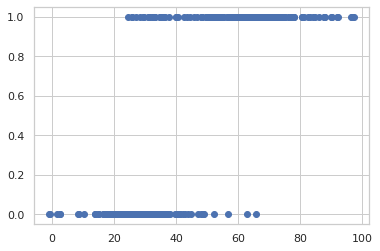

In [ ]:
plt.scatter(df['interest'], df['success'])

kesimpulan: **berdasar visualisasi data di atas dapat disimpulkan bahwa**
1. tingkat kesuskesan terbagi menjadi 2 (1 = sukses, 0 = kurang suskes)
2. interest yang lebih besar maka lebih besar pula kesuksesannya
3. umur yang lebih tua memiliki kesuksesan yang lebih besar

1. REGRESI LINEAR

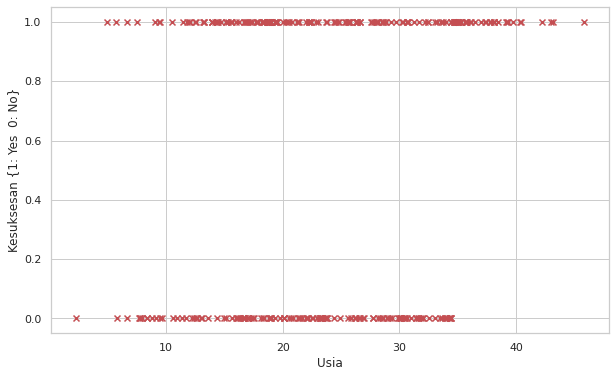

In [ ]:
# Plotting 
plt.figure(figsize=(10,6))
plt.scatter(df['age'], df['success'], c='r', marker='x')
plt.ylabel("Kesuksesan {1: Yes  0: No}")
plt.xlabel("Usia")
plt.show()

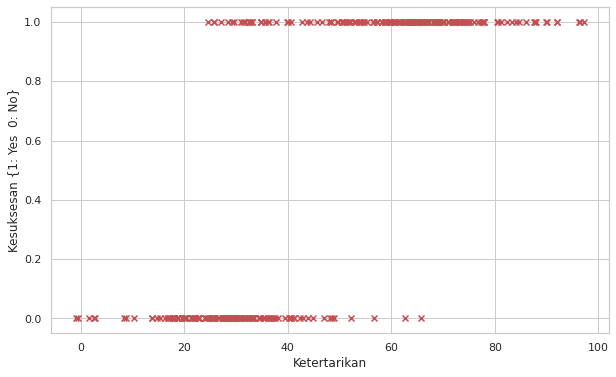

In [ ]:
# Plotting 
plt.figure(figsize=(10,6))
plt.scatter(df['interest'], df['success'], c='r', marker='x')
plt.ylabel("Kesuksesan {1: Yes  0: No}")
plt.xlabel("Ketertarikan")
plt.show()

jika buat garis linearnya atau regresi linearnya maka hasilnya adalah

In [ ]:

xx = df.age[:,np.newaxis] # Reshape
yy = df.success
zz = df.interest[:,np.newaxis]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


In [ ]:
regressor = LinearRegression()
regressor.fit(xx, yy)

LinearRegression()

In [ ]:
y_pred_age = regressor.predict(xx)

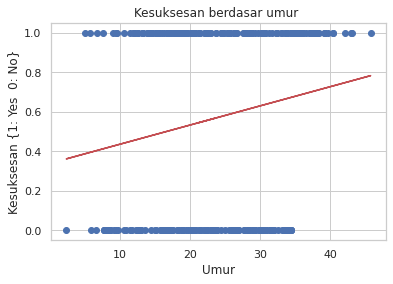

In [ ]:
plt.scatter(xx, yy)
plt.plot(xx, y_pred_age, "r-")
plt.title('Kesuksesan berdasar umur ')
plt.xlabel('Umur')
plt.ylabel('Kesuksesan {1: Yes  0: No}')
plt.show()

In [ ]:
regressor.score(xx,yy)

0.030035352079958

In [ ]:
regressor.fit(zz, yy)
y_pred_interest = regressor.predict(zz)

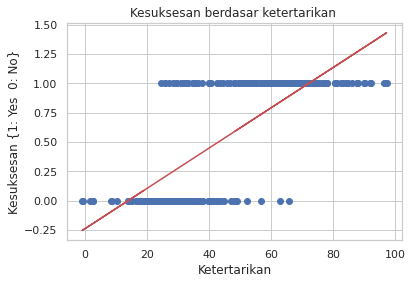

In [ ]:
plt.scatter(zz, yy)
plt.plot(zz, y_pred_interest, "r-")
plt.title('Kesuksesan berdasar ketertarikan ')
plt.xlabel('Ketertarikan')
plt.ylabel('Kesuksesan {1: Yes  0: No}')
plt.show()

In [ ]:
regressor.score(zz,yy)

0.5786689764466622

Kesimpulan: r**egresi linear tidak cocok untuk data ini**

2. REGRESI LOGISTIK

In [ ]:
#Splitting Data
dataframe = pd.read_csv('classification.csv')
X = dataframe.iloc[:,:-1]
y = dataframe.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3) # perbandingan dataset train 70% dan Testing 30%

In [ ]:
X

,age,interest
0,23.657801,18.859917
1,22.573729,17.969223
2,32.553424,29.463651
3,6.718035,25.704665
4,14.401919,16.770856
...,...,...
292,27.697220,18.799309
293,15.150959,72.000352
294,22.264378,68.453459
295,25.677420,90.118212


In [ ]:
y

0      0.0
1      0.0
2      0.0
3      1.0
4      0.0
      ... 
292    0.0
293    1.0
294    1.0
295    1.0
296    1.0
Name: success, Length: 297, dtype: float64

In [ ]:
print(y_test)

80     1.0
220    0.0
5      0.0
93     1.0
247    1.0
      ... 
58     0.0
43     1.0
149    0.0
50     1.0
99     0.0
Name: success, Length: 90, dtype: float64


In [ ]:
print(y_train)

121    0.0
63     1.0
132    0.0
202    1.0
29     1.0
      ... 
292    0.0
140    1.0
285    0.0
163    1.0
82     1.0
Name: success, Length: 207, dtype: float64


In [ ]:
# Training a logistic regression model
logistic_regressor = LogisticRegression(max_iter=1000)
pipeline = Pipeline(steps=[('add_poly_features', PolynomialFeatures()),
                           ('logistic_regression', logistic_regressor)])

In [ ]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [ ]:
print(y_pred)

[1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1.
 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1.
 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0.]


In [ ]:
# Applying confusion matrix on above data
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[32,  2],
       [ 4, 52]])

In [ ]:
#precision
from sklearn.metrics import confusion_matrix, precision_score, recall_score
precision_score(y_test,y_pred)

0.9629629629629629

In [ ]:
#recall
recall_score(y_test,y_pred)

0.9285714285714286

In [ ]:
## code for f-1 score

from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.9454545454545454

In [ ]:
#ROC
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
metrics.auc(fpr, tpr)

0.9348739495798319

In [ ]:
#Logarithmic Loss
from sklearn.metrics import log_loss
log_loss(y_test,y_pred)

2.3026028618258283

4. CLASSIFICATION

In [ ]:
df.columns

Index(['age', 'interest', 'success'], dtype='object')

In [ ]:
y = df['success'].values
y[0:5]

array([0., 0., 0., 1., 0.])

In [ ]:
X = df[['age','interest']].values
X[0:5]

array([[23.65780072, 18.8599168 ],
       [22.57372914, 17.96922325],
       [32.55342397, 29.46365141],
       [ 6.71803504, 25.70466547],
       [14.40191857, 16.77085649]])

In [ ]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float)) #normalisasi, preprocessing tidak hanya standartscaler
X[0:5]

array([[-0.005867  , -1.28318031],
       [-0.12837391, -1.32381516],
       [ 0.99939442, -0.79942121],
       [-1.92016715, -0.97091208],
       [-1.05183995, -1.37848654]])

In [ ]:
from sklearn.model_selection import train_test_split #training-test biasanya 80-20, 70-30
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=4) 
print('Train set: ', X_train.shape, y_train.shape) 
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (207, 2) (207,)
Test set:  (90, 2) (90,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Menggunakan KNeighbors

In [ ]:
k = 3
#train model and test

In [ ]:
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
knn

KNeighborsClassifier(n_neighbors=3)

In [ ]:
yhat = knn.predict(X_test) #data x yang ditest 20% dari data = 30 data
yhat

array([0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 0.])

In [ ]:
from sklearn import metrics
print("Train akurasi: ", metrics.accuracy_score(y_train, knn.predict(X_train)))
print('Test akurasi: ', metrics.accuracy_score(y_test,yhat))

Train akurasi:  0.9565217391304348
Test akurasi:  0.9555555555555556


In [ ]:
Ks=10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range (1,Ks):
  #Train model and predict
  neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
  yhat = neigh.predict(X_test)
  mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

  std_acc[n-1] = np.std(yhat == y_test)/np.sqrt(yhat.shape[0])
mean_acc



array([0.87777778, 0.9       , 0.95555556, 0.93333333, 0.91111111,
       0.93333333, 0.92222222, 0.93333333, 0.94444444])

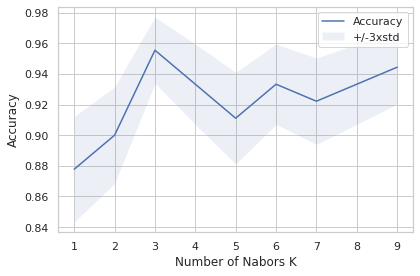

In [ ]:
plt.plot(range(1,Ks), mean_acc, 'b')
plt.fill_between(range(1,Ks),mean_acc -1 * std_acc, mean_acc + 1 * std_acc, alpha = 0.1)
plt.legend(('Accuracy', '+/-3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Nabors K')
plt.tight_layout()
plt.show()

In [ ]:
print ("The best accuracy was with", mean_acc.max(),"with k =", mean_acc.argmax()+1)

The best accuracy was with 0.9555555555555556 with k = 3


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, yhat))

[[34  4]
 [ 1 51]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

         0.0       0.97      0.89      0.93        38
         1.0       0.93      0.98      0.95        52

    accuracy                           0.94        90
   macro avg       0.95      0.94      0.94        90
weighted avg       0.95      0.94      0.94        90

